In [35]:
!pip install tensorflow

In [36]:
!pip install image


In [37]:


#  Cat vs Dog Classifier using MobileNetV2

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os, random

import tensorflow as tf
import os
import zipfile

In [38]:
# Download dataset automatically
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=False)
zip_dir = os.path.dirname(path_to_zip)

# Extract zip file
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(zip_dir)

# Paths for train/validation directories
base_dir = os.path.join(zip_dir, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

print("✅ Dataset ready at:", base_dir)

✅ Dataset ready at: /root/.keras/datasets/cats_and_dogs_filtered


In [39]:
#  Download and Extract Dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)
base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')


In [40]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [41]:
# Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze base layers


/tmp/ipython-input-2301857096.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [42]:
# Build Our Classifier on Top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [43]:
# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [44]:
# Train Model (Phase 1)
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 417ms/step - accuracy: 0.6589 - loss: 0.8544 - val_accuracy: 0.9270 - val_loss: 0.2074
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.8701 - loss: 0.2860 - val_accuracy: 0.9440 - val_loss: 0.1588
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.8797 - loss: 0.2531 - val_accuracy: 0.9460 - val_loss: 0.1430
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.9013 - loss: 0.2311 - val_accuracy: 0.9440 - val_loss: 0.1489
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9240 - loss: 0.1805 - val_accuracy: 0.9530 - val_loss: 0.1259
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.9152 - loss: 0.2017 - val_accuracy: 0.9510 - val_loss: 0.1248
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - accuracy: 0.9262 - loss: 0.2033 - val_accuracy: 0.9490 - val_loss: 0.1259
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.9285 - loss: 0.1726 - val_accu

In [45]:
# Fine-Tune Model (Unfreeze last 50 layers)
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 498ms/step - accuracy: 0.7634 - loss: 0.4373 - val_accuracy: 0.9610 - val_loss: 0.1107
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.8811 - loss: 0.2900 - val_accuracy: 0.9610 - val_loss: 0.1127
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.8969 - loss: 0.2464 - val_accuracy: 0.9610 - val_loss: 0.1116
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.9105 - loss: 0.2237 - val_accuracy: 0.9600 - val_loss: 0.1123
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.9058 - loss: 0.2213 - val_accuracy: 0.9610 - val_loss: 0.1102
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 0.9268 - loss: 0.1926 - val_accuracy: 0.9600 - val_loss: 0.1071
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 0.9236 - loss: 0.1957 - val_accuracy: 0.9590 - val_loss: 0.1044
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - accuracy: 0.9285 - loss: 0.1831 - val_accu

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9710 - loss: 0.0872

✅ Final Validation Accuracy: 96.10%


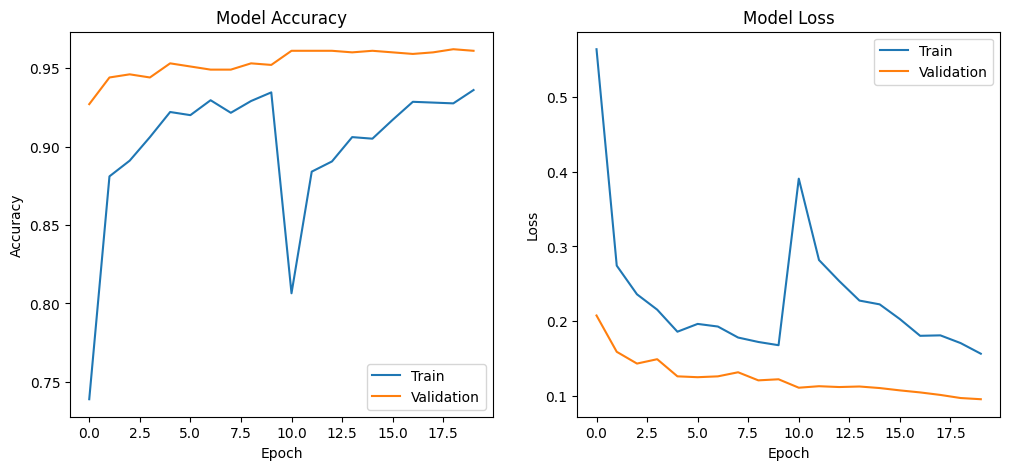

In [46]:
# Evaluate Accuracy
val_loss, val_acc = model.evaluate(val_gen)
print(f"\n✅ Final Validation Accuracy: {val_acc * 100:.2f}%")

# Plot Accuracy and Loss
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

/tmp/ipython-input-753982960.py:29: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


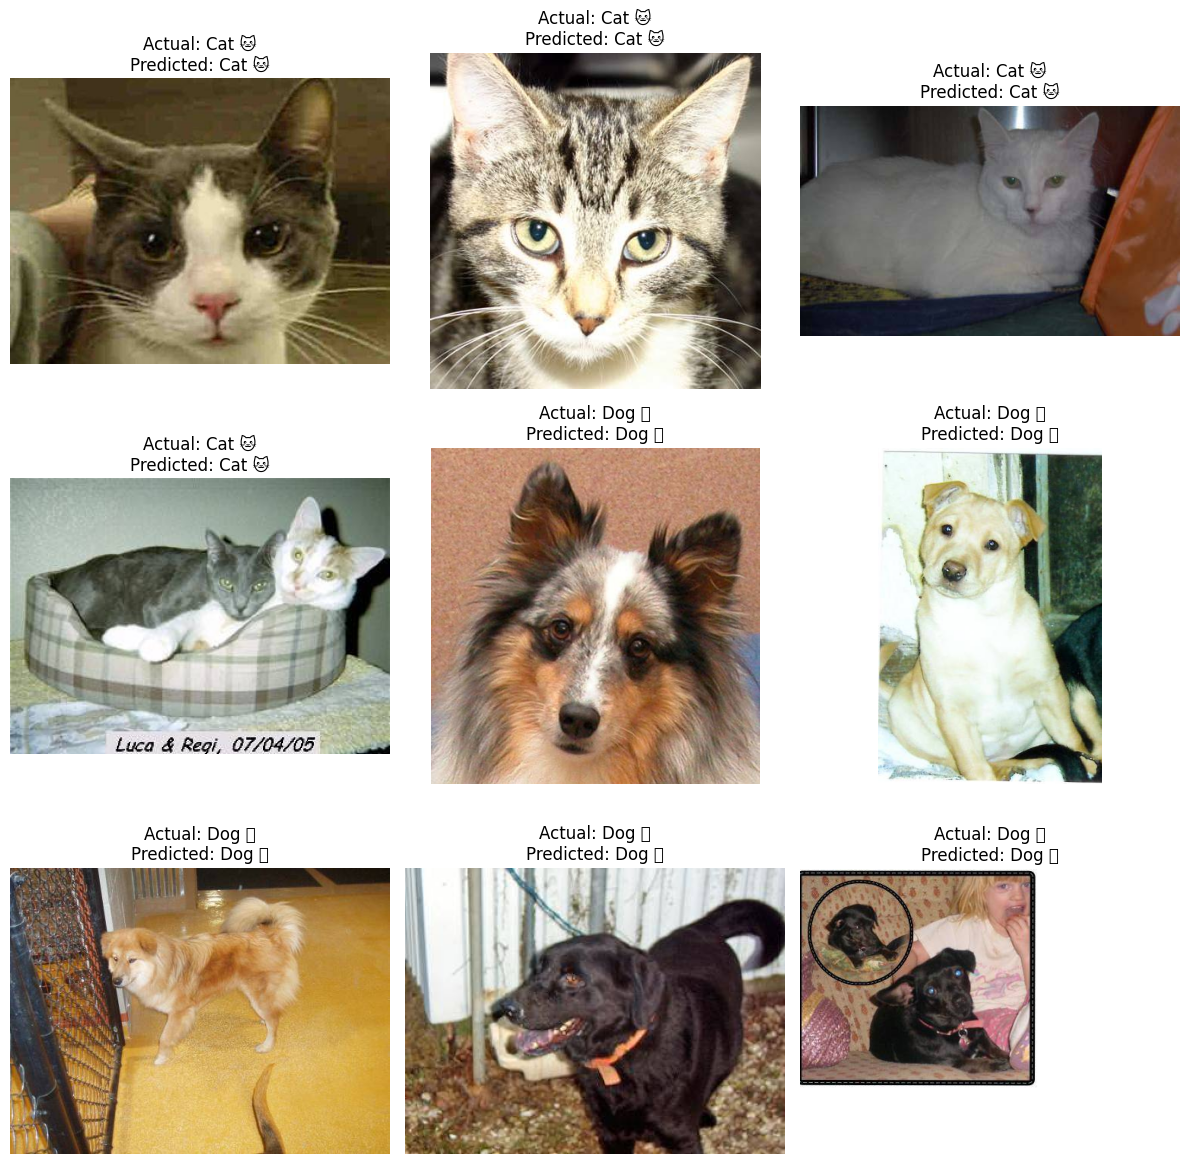

In [47]:
# Test 9 Random Images
cat_dir = os.path.join(val_dir, 'cats')
dog_dir = os.path.join(val_dir, 'dogs')

sample_images = random.sample(os.listdir(cat_dir), 4) + random.sample(os.listdir(dog_dir), 5)
plt.figure(figsize=(12, 12))

for i, img_name in enumerate(sample_images):
    if 'cat' in img_name:
        path = os.path.join(cat_dir, img_name)
        actual = 'Cat 🐱'
    else:
        path = os.path.join(dog_dir, img_name)
        actual = 'Dog 🐶'

    # ✅ Use load_img and img_to_array directly
    img = load_img(path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)[0][0]
    predicted = 'Dog 🐶' if prediction > 0.5 else 'Cat 🐱'

    plt.subplot(3, 3, i + 1)
    plt.imshow(load_img(path))
    plt.title(f"Actual: {actual}\nPredicted: {predicted}")
    plt.axis('off')

plt.tight_layout()
plt.show()

